In [72]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
df = pd.read_csv('Boston.csv')
#df['Unnamed: 0']

In [ ]:
# Fitting using statsmodels
mod = sm.OLS(df['medv'], df['lstat'])
#mod = smf.ols(formula='medv ~ lstat', data=df)  #Another way of doing it. 
lm1 = mod.fit()
print(lm1.summary())

In [60]:
## Fitting using using skl
feature_cols = ['lstat']
X = df[feature_cols]
y = df['medv']
lm2 = LinearRegression().fit(X,y)

Obtaining various statistics using skl or sm or both
    1. Coefficients
    2. Interecept
    3. P values of the coefficients
    4. Confidence intervals
    5. R-Squared
    6. Predicted values
    7. Residuals
It seems like skl does not do well in hypothesis testing. It is giving co-efficient and r2 but not p-values or confidence intervals. 

In [80]:
#Coefficients and intercpet
print(lm1.params)
print("Intercept : {}".format(lm2.intercept_))
print("Coefficients : {}".format(lm2.coef_))
#list(zip(feature_cols, lm2.coef_))
print('-'*80)    

#Pvalues and confidence intervals
print(lm1.pvalues)
print(lm1.conf_int()) #This gives 90% confidence interval
print('-'*80)

#R-Squared
print("R-Squared : {}".format(lm1.rsquared))
print("Score(R-square) : {}".format(lm2.score(X,y)))
print('-'*80)

#Prediction
X_new = pd.DataFrame({'lstat': [50]})
print(lm1.predict(X_new))
print(lm2.predict(X_new.values))
print('-'*80)

#Residuals
r = y - lm2.predict(X)
print("Mean of residuals : {}".format(np.mean(r)))
print("Standard deviation of residuals : {}".format(np.std(r)))

Intercept    34.553841
lstat        -0.950049
dtype: float64
Intercept : 34.55384087938309
Coefficients : [-0.95004935]
--------------------------------------------------------------------------------
Intercept    3.743081e-236
lstat         5.081103e-88
dtype: float64
                   0          1
Intercept  33.448457  35.659225
lstat      -1.026148  -0.873951
--------------------------------------------------------------------------------
R-Squared : 0.5441462975864797
Score(R-square) : 0.5441462975864797
--------------------------------------------------------------------------------
0   -12.948627
dtype: float64
[-12.94862681]
--------------------------------------------------------------------------------
Mean of residuals : -9.941981362018793e-15
Standard deviation of residuals : 6.20346413142642


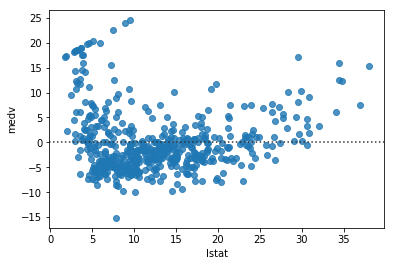

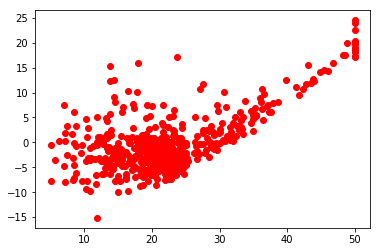

In [86]:
## Residual plot using seaborn
sns.residplot(df['lstat'], df['medv'])
plt.show()

## Residual plot manually
plt.plot(y, r, 'ro')
plt.show()